<a href="https://colab.research.google.com/github/coonalcodes/Airbnb-Bookings-Analysis---Capstone-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [146]:
# importing libraries to process the data
import pandas as pd
import numpy as np


In [147]:
url='https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=share_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df=pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0




*   Info about the data to check the data type and null values present in our data





In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

There are null values present in name,host_name,last_review,reviews_per_month columns. There is requirement of data cleaning

In [149]:
#Checking the exact count of null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We will have to remove some unimportant columns from our data and fill the null values with 0 to proceed with the data.
For ex. we can fill null values in reviews_per_month column with 0, which will mean that there are no revieiws in that month. We can drop the columns like, host_name as we have host_id with us which are unique. We can also remove last_review as it will not be very significant for our analysis. 

In [150]:
#dropping the columns host_name and last_review
df.drop(['host_name','last_review'],axis=1, inplace=True)

In [151]:
#checking whether we have dropped correct columns
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [152]:
#replacing null values with '0'
df.fillna({'reviews_per_month':0}, inplace=True)
#checking the correctness of the code
df.reviews_per_month.isnull().sum()

0

In [153]:
#checking the unique values in the neighbourhoods & neighbourhood groups
unique_neighourhood=df['neighbourhood'].unique()
unique_neighourhood_groups=df['neighbourhood_group'].unique()
print(len(unique_neighourhood))
print(len(unique_neighourhood_groups))
#There are 221 neighbourhoods & 5 neighbourhood groups which are unique

221
5


In [154]:
#importing important liabraries
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
top_15_neighbourhoods=df.neighbourhood.value_counts().head(15)
top_15_neighbourhoods

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Name: neighbourhood, dtype: int64

Text(0, 0.5, 'Number of listings ')

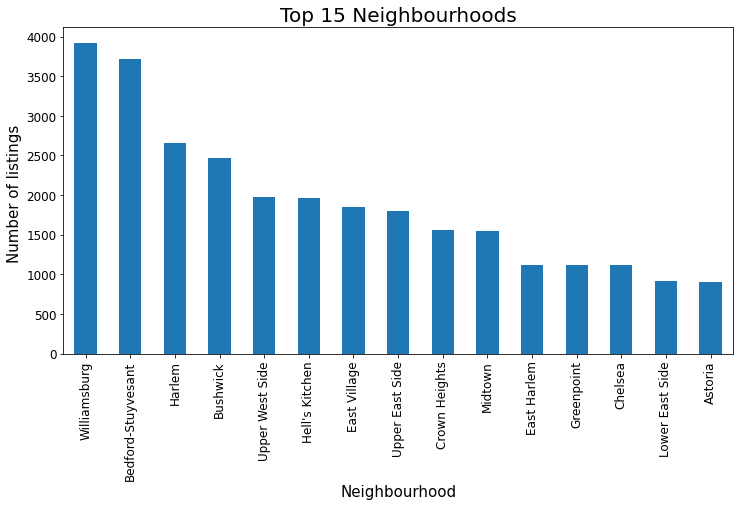

In [156]:
top_15_neighbourhoods = top_15_neighbourhoods.plot.bar(figsize = (12,6), fontsize = 12)
top_15_neighbourhoods.set_title('Top 15 Neighbourhoods',fontsize = 20)
top_15_neighbourhoods.set_xlabel('Neighbourhood',fontsize = 15)
top_15_neighbourhoods.set_ylabel('Number of listings ',fontsize = 15)


In [157]:
Grouping_neighbourhoods = df.groupby('neighbourhood_group')['neighbourhood'].count().sort_values()
Grouping_neighbourhoods.head()
Grouping_neighbourhoods.sum()

48895

Text(0, 0.5, 'Neighbourood listings ')

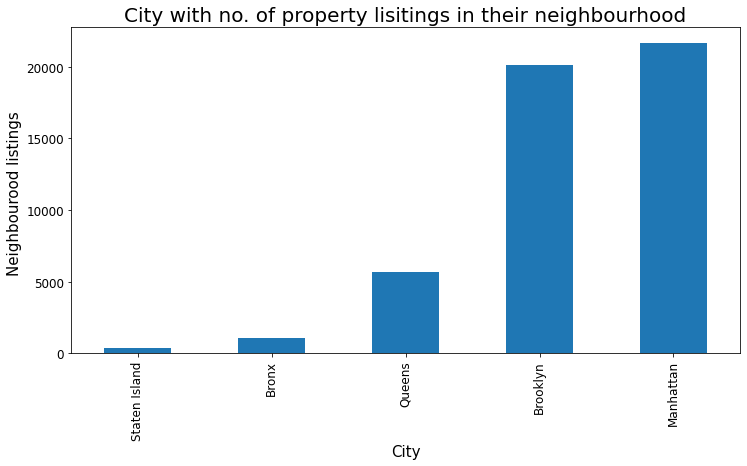

In [158]:
Grouping_neighbourhoods = Grouping_neighbourhoods.plot.bar(figsize = (12,6), fontsize = 12)
Grouping_neighbourhoods.set_title('City with no. of property lisitings in their neighbourhood',fontsize = 20)
Grouping_neighbourhoods.set_xlabel('City',fontsize = 15)
Grouping_neighbourhoods.set_ylabel('Neighbourood listings ',fontsize = 15)


We can clearly see that Manhattan has the most lsitings amongst all the Cities and it is very obvious as it is one of most popular city for travellers around the world.

Now let's check the price pattern in different cities, to check the cheapest and costliest city to stay.

In [159]:
#lets check if there is a need of data cleaning in pricing
price_pattern=pd.DataFrame(df['price'].describe()).T
price_pattern

,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720687,240.15417,0.0,69.0,106.0,175.0,10000.0


We can see that, 75% of the values are falling in the price range of 175 and maximum value is 10,000. It means that an outlier is present in our data.
We will take only those values which are close to our top 75% prices.


In [160]:
175*2.5

437.5

In [161]:
#Removing outliers from price column and forming a new data set
df=df[(df['price']>0) & (df['price']<440)]      #approx 175*2.5
#Checking the code
df['price'].max()

439

In [162]:
City_price_pattern=df.groupby('neighbourhood_group')['price'].mean().sort_values()
City_price_pattern_df=pd.DataFrame(City_price_pattern)
City_price_pattern_df

,price
neighbourhood_group,
Bronx,79.650882
Staten Island,90.163934
Queens,91.295689
Brooklyn,110.075234
Manhattan,156.951121


In [163]:
import matplotlib.image as mpimg
%matplotlib inline

Text(0, 0.5, 'Avg Price')

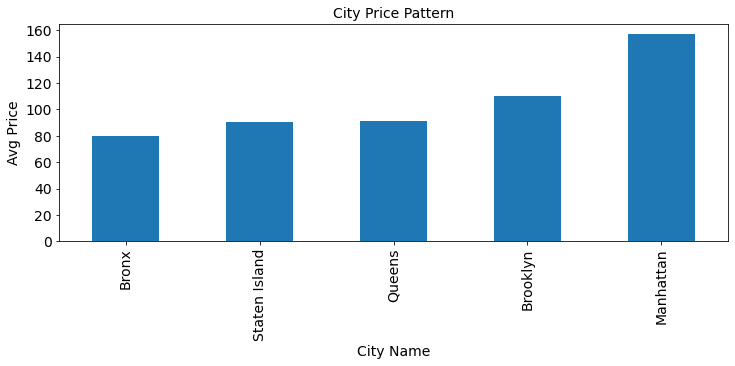

In [164]:
mean_price_plot=City_price_pattern.plot.bar(figsize=(12,4),fontsize=14)
mean_price_plot.set_title('City Price Pattern', fontsize=14)
mean_price_plot.set_xlabel('City Name', fontsize=14)
mean_price_plot.set_ylabel('Avg Price', fontsize=14)


Lets check which room type is most demanding

In [165]:
df['room_type'].value_counts()
# We have most listings of Entire home/apt

Entire home/apt    23990
Private room       22125
Shared room         1146
Name: room_type, dtype: int64

In [166]:
prices_roomtype=df.groupby('room_type')['price'].mean()
prices_roomtype
#Entire home/apt is costliest and shared room is cheapest

room_type
Entire home/apt    173.234931
Private room        80.887006
Shared room         62.149215
Name: price, dtype: float64

In [171]:
#Data analysis on Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
sub_1_private_rooms=sub_1.loc[sub_1['room_type'] == 'Private room']
costlier_private_rooms=sub_1_private_rooms[sub_1_private_rooms['price']>300]
Fig_2=costlier_private_rooms['host_id'].value_counts().head(10)

Text(0, 0.5, 'No. of Properties which cost > $300')

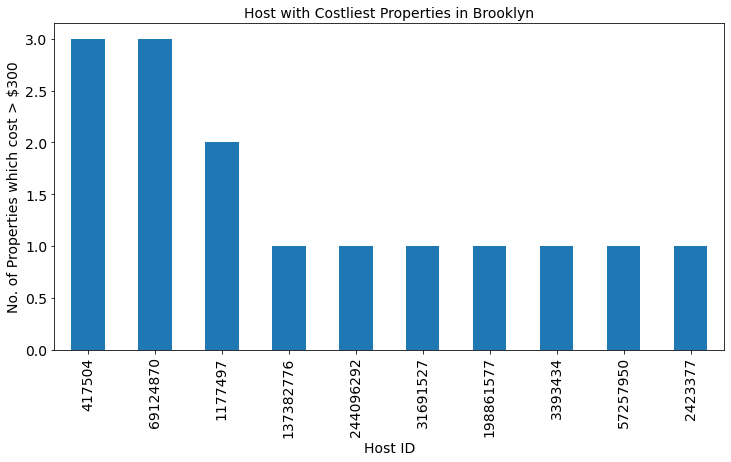

In [174]:
Brooklyn_costlier_private_rooms=Fig_2.plot.bar(figsize=(12,6),fontsize=14)
Brooklyn_costlier_private_rooms.set_title('Host with Costliest Properties in Brooklyn',fontsize=14)
Brooklyn_costlier_private_rooms.set_xlabel('Host ID',fontsize=14)
Brooklyn_costlier_private_rooms.set_ylabel('No. of Properties which cost > $300',fontsize=14)